# Tweet Analysis

## Three (okay, five) Observations

### -Compound sentiment is not correctated with time of tweet.
### -Running the scipt several times over a day shows wide variance in compound sentiment--there is broad variance in each news outlet's tweets.
### -News outlets are biased. Were they not biased, the compound score would consistently be much closer to zero. No surprise here; news organizations are composed of people, and people have opinions that are naturally expressed in their work.
### -The bar chart at the end seems to suggest that CNN is the least biased on the five news organizations, but iterating this script many times reveals that each new organization will, at one time or another, appear to be the least biased.
### Similarly, the news organizations that appear the least biased changes with each iteration.

In [192]:
# Dependencies
import tweepy
import pandas as pd
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from textblob import TextBlob


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "jAbGOBReVhtdvNCipZ9rG9I8s"
consumer_secret = "zVlbgO1H5560LpW3f2fpOmAydtVbeJPODC2njrTQqjpW3SY9U5"
access_token = "970003904422469634-Q6KmoIeSKEkLX3rOfjT81oK9cF9NKhT"
access_token_secret = "ZrXk8Eb5A8xuFDEaA4JUbO3BMFOlx0AmZQymdCek4iu2Q"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Target User Account
target_user_bbc = "BBCWorld"
target_user_cbs = "CBSNews"
target_user_cnn = "CNN"
target_user_fox = "FoxNews"
target_user_nyt = "nytimes"

combined_tweets = []
bbc_tweets = []
cbs_tweets = []
cnn_tweets = []
fox_tweets = []
nyt_tweets = []

for page in tweepy.Cursor(api.user_timeline, id=target_user_bbc).pages(6):
    # page is a list of statuses
    for tweet in page:
        tweet_text = json.dumps(tweet._json, indent=3)
        bbc_tweet = json.loads(tweet_text)
        combined_tweets.append(bbc_tweet)
        bbc_tweets.append(bbc_tweet)
        
for page in tweepy.Cursor(api.user_timeline, id=target_user_cbs).pages(6):
    # page is a list of statuses
    for tweet in page:
        tweet_text = json.dumps(tweet._json, indent=3)
        cbs_tweet = json.loads(tweet_text)
        combined_tweets.append(cbs_tweet)
        cbs_tweets.append(cbs_tweet)
        
for page in tweepy.Cursor(api.user_timeline, id=target_user_cnn).pages(6):
    # page is a list of statuses
    for tweet in page:
        tweet_text = json.dumps(tweet._json, indent=3)
        cnn_tweet = json.loads(tweet_text)
        combined_tweets.append(cnn_tweet)
        cnn_tweets.append(cnn_tweet)
  
for page in tweepy.Cursor(api.user_timeline, id=target_user_fox).pages(6):
    # page is a list of statuses
    for tweet in page:
        tweet_text = json.dumps(tweet._json, indent=3)
        fox_tweet = json.loads(tweet_text)
        combined_tweets.append(fox_tweet)
        fox_tweets.append(fox_tweet)
        
for page in tweepy.Cursor(api.user_timeline, id=target_user_nyt).pages(6):
    # page is a list of statuses
    for tweet in page:
        tweet_text = json.dumps(tweet._json, indent=3)
        nyt_tweet = json.loads(tweet_text)
        combined_tweets.append(nyt_tweet)
        nyt_tweets.append(nyt_tweet)

In [193]:
print(combined_tweets)

[{'created_at': 'Fri Mar 09 02:09:54 +0000 2018', 'id': 971931050568949765, 'id_str': '971931050568949765', 'text': "Patrolling Mexico's most densely populated suburb https://t.co/rJjEhrATzQ", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/rJjEhrATzQ', 'expanded_url': 'http://bbc.in/2tp6U9S', 'display_url': 'bbc.in/2tp6U9S', 'indices': [50, 73]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 742143, 'id_str': '742143', 'name': 'BBC News (World)', 'screen_name': 'BBCWorld', 'location': 'London, UK', 'description': "News, features and analysis from the World's newsroom. Breaking news, follow @BBCBreaking. UK news, @BBCNews. Latest sports news @BBCSport", 'url': 'https://t.co/7NEgoMwJy3', 'entities': {'url': {'url

In [194]:
compound_list = []
pos_list = []
neu_list = []
neg_list = []


# Use cursor to loop through 20 pages (total 200 tweets)
for tweet in combined_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list.append(compound)
        pos = analyzer.polarity_scores(tweet.get('text'))["pos"]
        pos_list.append(pos)
        neu = analyzer.polarity_scores(tweet.get('text'))["neu"]
        neu_list.append(neu)
        neg = analyzer.polarity_scores(tweet.get('text'))["neg"]
        neg_list.append(neg)


In [195]:
tweet_timestamps = []

for tweet in combined_tweets:
    tweet_timestamps.append(tweet["created_at"])
tweet_timestamps

['Fri Mar 09 02:09:54 +0000 2018',
 'Fri Mar 09 01:58:31 +0000 2018',
 'Fri Mar 09 01:50:38 +0000 2018',
 'Fri Mar 09 01:50:04 +0000 2018',
 'Fri Mar 09 01:45:22 +0000 2018',
 'Fri Mar 09 01:44:10 +0000 2018',
 'Fri Mar 09 01:37:24 +0000 2018',
 'Fri Mar 09 01:35:46 +0000 2018',
 'Fri Mar 09 00:25:11 +0000 2018',
 'Fri Mar 09 00:03:56 +0000 2018',
 'Thu Mar 08 22:41:43 +0000 2018',
 'Thu Mar 08 22:32:31 +0000 2018',
 'Thu Mar 08 22:32:31 +0000 2018',
 'Thu Mar 08 22:28:09 +0000 2018',
 'Thu Mar 08 22:02:12 +0000 2018',
 'Thu Mar 08 21:27:34 +0000 2018',
 'Thu Mar 08 21:02:21 +0000 2018',
 'Thu Mar 08 21:02:21 +0000 2018',
 'Thu Mar 08 19:28:44 +0000 2018',
 'Thu Mar 08 19:17:52 +0000 2018',
 'Thu Mar 08 18:45:37 +0000 2018',
 'Thu Mar 08 18:39:26 +0000 2018',
 'Thu Mar 08 18:39:26 +0000 2018',
 'Thu Mar 08 18:34:09 +0000 2018',
 'Thu Mar 08 18:04:16 +0000 2018',
 'Thu Mar 08 17:00:36 +0000 2018',
 'Thu Mar 08 16:44:53 +0000 2018',
 'Thu Mar 08 16:21:27 +0000 2018',
 'Thu Mar 08 16:15:4

In [196]:
converted_timestamps = []
for raw_time in tweet_timestamps:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
print(converted_timestamps)

[datetime.datetime(2018, 3, 9, 2, 9, 54, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 58, 31, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 50, 38, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 50, 4, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 45, 22, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 44, 10, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 37, 24, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 1, 35, 46, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 0, 25, 11, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 9, 0, 3, 56, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 8, 22, 41, 43, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 8, 22, 32, 31, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 8, 22, 32, 31, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 3, 8, 22, 28, 9, tzinfo=datetime.timezo

In [197]:
combined_tweets_df = pd.DataFrame(combined_tweets)
combined_tweets_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Fri Mar 09 02:09:54 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,49,False,None,971931050568949765,971931050568949765,...,NaN,NaN,NaN,21,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",Patrolling Mexico's most densely populated sub...,False,"{'id': 742143, 'id_str': '742143', 'name': 'BB..."
1,None,None,Fri Mar 09 01:58:31 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,93,False,None,971928183422554112,971928183422554112,...,{'created_at': 'Fri Mar 09 01:08:14 +0000 2018...,9.719155e+17,971915531346436096,46,False,NaN,"<a href=""https://about.twitter.com/products/tw...","If @realDonaldTrump tweets it, it must be offi...",True,"{'id': 742143, 'id_str': '742143', 'name': 'BB..."
2,None,None,Fri Mar 09 01:50:38 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,971926199801991168,971926199801991168,...,NaN,NaN,NaN,218,False,{'created_at': 'Fri Mar 09 01:50:04 +0000 2018...,"<a href=""https://about.twitter.com/products/tw...",RT @BBCWorld: In case you haven't heard: US Pr...,False,"{'id': 742143, 'id_str': '742143', 'name': 'BB..."
3,None,None,Fri Mar 09 01:50:04 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,323,False,None,971926059124969472,971926059124969472,...,NaN,NaN,NaN,218,False,NaN,"<a href=""https://about.twitter.com/products/tw...",In case you haven't heard: US President @realD...,True,"{'id': 742143, 'id_str': '742143', 'name': 'BB..."
4,None,None,Fri Mar 09 01:45:22 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,110,False,None,971924874133458945,971924874133458945,...,NaN,NaN,NaN,48,False,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",Have you ever dreamed of flying in your car? h...,False,"{'id': 742143, 'id_str': '742143', 'name': 'BB..."


In [198]:
combined_tweets_df['conv_timestamp'] = tweet_timestamps
combined_tweets_df['sent_compound'] = compound_list
combined_tweets_df['sent_positive'] = pos_list
combined_tweets_df['sent_neutral'] = neu_list
combined_tweets_df['sent_negative'] = neg_list

In [199]:
combined_tweets_df = combined_tweets_df.drop(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweeted', 'retweeted_status',
       'source', 'truncated'], axis=1) 

In [200]:
combined_tweets_df.head()

,quoted_status,quoted_status_id,quoted_status_id_str,text,user,conv_timestamp,sent_compound,sent_positive,sent_neutral,sent_negative
0,NaN,NaN,NaN,Patrolling Mexico's most densely populated sub...,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Fri Mar 09 02:09:54 +0000 2018,0.0000,0.000,1.000,0.0
1,{'created_at': 'Fri Mar 09 01:08:14 +0000 2018...,9.719155e+17,971915531346436096,"If @realDonaldTrump tweets it, it must be offi...","{'id': 742143, 'id_str': '742143', 'name': 'BB...",Fri Mar 09 01:58:31 +0000 2018,0.0000,0.000,1.000,0.0
2,NaN,NaN,NaN,RT @BBCWorld: In case you haven't heard: US Pr...,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Fri Mar 09 01:50:38 +0000 2018,0.2732,0.095,0.905,0.0
3,NaN,NaN,NaN,In case you haven't heard: US President @realD...,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Fri Mar 09 01:50:04 +0000 2018,0.2732,0.104,0.896,0.0
4,NaN,NaN,NaN,Have you ever dreamed of flying in your car? h...,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",Fri Mar 09 01:45:22 +0000 2018,0.0000,0.000,1.000,0.0


In [201]:
combined_tweets_df.to_csv('combined_tweets.csv')

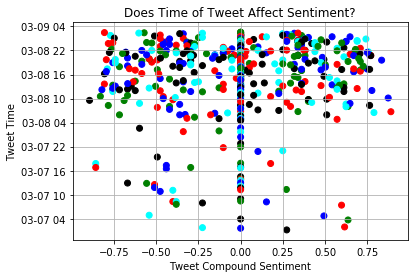

In [202]:
color =["green","red","cyan","blue","black"]
plt.scatter(compound_list, converted_timestamps, color=color, marker="o")

# Incorporate the other graph properties
plt.title("Does Time of Tweet Affect Sentiment?")
plt.ylabel("Tweet Time")
plt.xlabel("Tweet Compound Sentiment")
plt.grid(True)

# Save the figure
plt.savefig("tweet_time_comp.jpg")
plt.savefig("tweet_time_comp.png")

# Show plot
plt.show()

In [203]:
compound_list_bbc = []

for tweet in bbc_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_bbc.append(compound)

print("User: %s" % target_user_bbc)
print("Compound: %s" % np.mean(compound_list_bbc))

bbc_compound = np.mean(compound_list_bbc)
print(bbc_compound)

User: BBCWorld
Compound: -0.038555
-0.038555


In [204]:
compound_list_cbs = []

for tweet in cbs_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_cbs.append(compound)

print("User: %s" % target_user_cbs)
print("Compound: %s" % np.mean(compound_list_cbs))

cbs_compound = np.mean(compound_list_cbs)
print(cbs_compound)

User: CBSNews
Compound: -0.0329016666667
-0.0329016666667


In [205]:
compound_list_cnn = []

for tweet in cnn_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_cnn.append(compound)

print("User: %s" % target_user_cnn)
print("Compound: %s" % np.mean(compound_list_cnn))

cnn_compound = np.mean(compound_list_cnn)
print(cnn_compound)

User: CNN
Compound: -0.01011
-0.01011


In [206]:
compound_list_fox = []

for tweet in fox_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_fox.append(compound)

print("User: %s" % target_user_fox)
print("Compound: %s" % np.mean(compound_list_fox))

fox_compound = np.mean(compound_list_fox)
print(fox_compound)

User: FoxNews
Compound: 0.0322675
0.0322675


In [207]:
compound_list_nyt = []

for tweet in nyt_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_nyt.append(compound)

print("User: %s" % target_user_nyt)
print("Compound: %s" % np.mean(compound_list_nyt))

nyt_compound = np.mean(compound_list_nyt)
print(nyt_compound)

User: nytimes
Compound: 0.0135841666667
0.0135841666667


In [208]:
compound_list_cbs = []

for tweet in cbs_tweets:
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet.get('text'))["compound"]
        compound_list_cbs.append(compound)

print("User: %s" % target_user_cbs)
print("Compound: %s" % np.mean(compound_list_cbs))

cbs_compound = np.mean(compound_list_cbs)
print(cbs_compound)

User: CBSNews
Compound: -0.0329016666667
-0.0329016666667


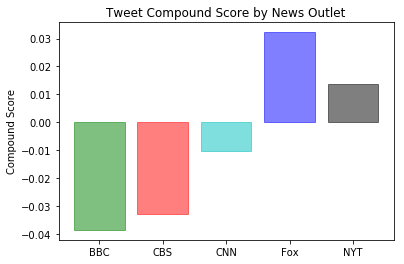

In [209]:
objects = ('BBC', 'CBS', 'CNN', 'Fox', 'NYT')
y_pos = np.arange(len(objects))
performance = [bbc_compound,cbs_compound,cnn_compound,fox_compound,nyt_compound]
 
barlist=plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Compound Score')
plt.title('Tweet Compound Score by News Outlet')

 
barlist[0].set_color('g', )
barlist[1].set_color('r', )  
barlist[2].set_color('c', )  
barlist[3].set_color('b', )  
barlist[4].set_color('k', )  

# Save the figure
plt.savefig("tweet_comp.jpg")
plt.savefig("tweet_comp.png")

plt.show()
